In [1]:
import mdtraj as md
import numpy as np
import pandas as pd
import csv
import pprint
import matplotlib.pyplot as plt

In [2]:
t= md.load('alanine-dipeptide-nowater.pdb')

In [3]:
top = t.topology

In [5]:
table, bonds = top.to_dataframe()

In [6]:
bonds

array([[ 1.,  4.,  0.,  0.],
       [ 4.,  5.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  2.,  0.,  0.],
       [ 1.,  3.,  0.,  0.],
       [ 4.,  6.,  0.,  0.],
       [ 8., 14.,  0.,  0.],
       [14., 15.,  0.,  0.],
       [ 8., 10.,  0.,  0.],
       [ 8.,  9.,  0.,  0.],
       [ 6.,  8.,  0.,  0.],
       [10., 11.,  0.,  0.],
       [10., 12.,  0.,  0.],
       [10., 13.,  0.,  0.],
       [ 6.,  7.,  0.,  0.],
       [14., 16.,  0.,  0.],
       [18., 19.,  0.,  0.],
       [18., 20.,  0.,  0.],
       [18., 21.,  0.,  0.],
       [16., 18.,  0.,  0.],
       [16., 17.,  0.,  0.]])

In [7]:
table.head

<bound method NDFrame.head of     serial name element  resSeq resName  chainID segmentID
0        1   H1       H       1     ACE        0          
1        2  CH3       C       1     ACE        0          
2        3   H2       H       1     ACE        0          
3        4   H3       H       1     ACE        0          
4        5    C       C       1     ACE        0          
5        6    O       O       1     ACE        0          
6        7    N       N       2     ALA        0          
7        8    H       H       2     ALA        0          
8        9   CA       C       2     ALA        0          
9       10   HA       H       2     ALA        0          
10      11   CB       C       2     ALA        0          
11      12  HB1       H       2     ALA        0          
12      13  HB2       H       2     ALA        0          
13      14  HB3       H       2     ALA        0          
14      15    C       C       2     ALA        0          
15      16    O       O   

In [8]:
traj_target_path = 'traj_org.dcd'
traj_path = 'traj_new.dcd'
traj_target = md.load_dcd(traj_target_path, top=top)
traj = md.load_dcd(traj_path, top=top)

In [9]:
traj.xyz.shape

(200000, 22, 3)

In [10]:
traj.n_atoms

22

In [11]:
traj.n_residues

3

In [12]:
traj.time[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
for i in range(t.n_atoms):
    print( i, top.atom(i).name)

0 H1
1 CH3
2 H2
3 H3
4 C
5 O
6 N
7 H
8 CA
9 HA
10 CB
11 HB1
12 HB2
13 HB3
14 C
15 O
16 N
17 H
18 C
19 H1
20 H2
21 H3


In [8]:
for i in range(t.n_residues):
    print(top.residue(i).name)

ACE
ALA
NME


In [15]:
#proteinのみ
atom_list = top.select("is_protein True")
#backboneのみ
atom_list = top.select("is_backbone True")
#sidechainのみ
atom_list = top.select("is_sidechain True")

In [16]:
#phi C-N-CT-C psi N-CT-C-N
phi_indices, psi_indices = [4, 6, 8, 14],[6, 8, 14, 16] # phiはC-N-Cα-C,psiはN-Cα-C-N
angles_target = md.compute_dihedrals(traj_target, [phi_indices, psi_indices])
angles = md.compute_dihedrals(traj, [phi_indices, psi_indices])

In [17]:
md.compute_phi(traj) #https://mdtraj.org/1.8.0/analysis.html

(array([[ 4,  6,  8, 14]]),
 array([[-1.1155005],
        [-2.6002693],
        [-1.315187 ],
        ...,
        [-1.3197063],
        [-1.448113 ],
        [-1.2685145]], dtype=float32))

In [18]:
md.compute_psi(traj)

(array([[ 6,  8, 14, 16]]),
 array([[-1.7222887],
        [ 0.1922141],
        [-0.7502973],
        ...,
        [ 1.4819232],
        [ 2.6508157],
        [ 2.2078996]], dtype=float32))

(-3.141592653589793, 3.141592653589793)

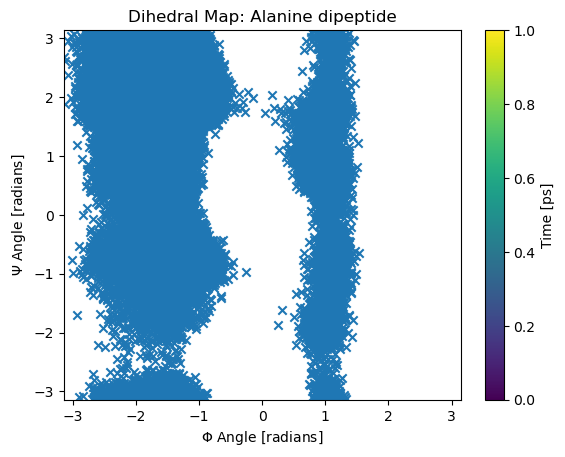

In [19]:
#ラマチャンドランプロット
%matplotlib inline
from pylab import *
from math import pi

figure()
title('Dihedral Map: Alanine dipeptide')
scatter(angles[:, 0], angles[:, 1], marker='x')
cbar = colorbar()
cbar.set_label('Time [ps]')
xlabel(r'$\Phi$ Angle [radians]')
xlim(-pi, pi)
ylabel(r'$\Psi$ Angle [radians]')
ylim(-pi, pi)

(-3.141592653589793, 3.141592653589793)

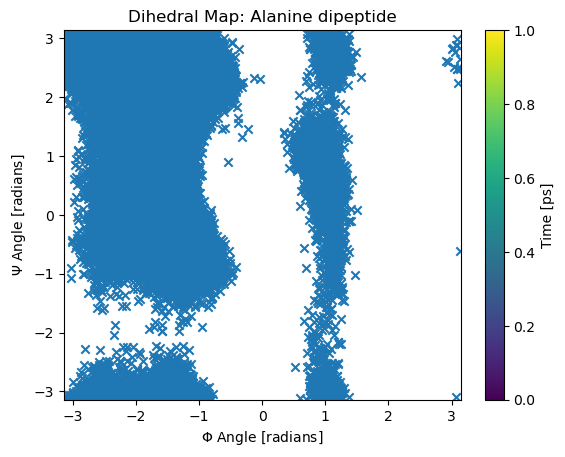

In [20]:
#ラマチャンドランプロット
%matplotlib inline
from pylab import *
from math import pi

figure()
title('Dihedral Map: Alanine dipeptide')
scatter(angles_target[:, 0], angles_target[:, 1], marker='x')
cbar = colorbar()
cbar.set_label('Time [ps]')
xlabel(r'$\Phi$ Angle [radians]')
xlim(-pi, pi)
ylabel(r'$\Psi$ Angle [radians]')
ylim(-pi, pi)

In [22]:
angles

array([[-1.1155005, -1.7222887],
       [-2.6002693,  0.1922141],
       [-1.315187 , -0.7502973],
       ...,
       [-1.3197063,  1.4819232],
       [-1.448113 ,  2.6508157],
       [-1.2685145,  2.2078996]], dtype=float32)

In [23]:
angles[1,0]

-2.6002693

In [24]:
angles.shape

(200000, 2)

In [25]:
#ファイルへの書き込み
with open('traj_target.txt', 'w') as f:
    for i in range(angles_target.shape[0]):
        s = f'{angles_target[i,0]}\t{angles_target[i,1]}\n'
        f.write(s)

In [26]:
with open('traj.txt', 'w') as f:
    for i in range(angles.shape[0]):
        s = f'{angles[i,0]}\t{angles[i,1]}\n'
        f.write(s)

In [27]:
print(s)

-1.2685145139694214	2.207899570465088



In [28]:
angles[0,0]

-1.1155005